<a href="https://colab.research.google.com/github/felipesora/CP1-Analise-Dados-Consumidores-Energia/blob/main/CP1_Analise_Dados_Consumidores_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Checkpoint 01: Análise de Dados de Consumidores de Energia**

Felipe Ulson Sora - RM555462

Link para download do conjunto de dados:
https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

In [ ]:
import pandas as pd

### Exercícios Aula 20/08.

1. Carregue o dataset e exiba as 10 primeiras linhas.

In [25]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

Global_active_power

- O que é: É a potência ativa total consumida por todos os aparelhos elétricos de uma residência ou instalação em determinado momento.

- Unidade: Geralmente em kilowatts (kW).

- Função na prática: Representa a energia que efetivamente realiza trabalho (como acender lâmpadas, ligar o chuveiro, rodar a geladeira).

- Exemplo: Se você liga um chuveiro de 2 kW e uma lâmpada de 0,1 kW, a Global_active_power mede a soma, ou seja, 2,1 kW de potência sendo usada de fato.

Global_reactive_power

- O que é: É a potência reativa total, ou seja, a energia que não realiza trabalho útil, mas que é necessária para o funcionamento de equipamentos que usam campos magnéticos, como motores, transformadores e condensadores.

- Unidade: Geralmente em kilovolt-ampere reativo (kVAR).

- Função na prática: Mantém os campos elétricos e magnéticos dentro dos aparelhos; embora não seja usada diretamente para produzir trabalho, é fundamental para o funcionamento de certos equipamentos.

- Exemplo: Um motor de geladeira consome 0,2 kW de potência reativa enquanto está ligado, para gerar o campo magnético que faz o motor girar.

Conclusão:

- Potência ativa (Global_active_power): gera trabalho útil.

- Potência reativa (Global_reactive_power): mantém os campos elétricos/magnéticos necessários, mas não realiza trabalho direto.

3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [26]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente.

In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
df.head()

/tmp/ipython-input-2254452357.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [32]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]
consumo_diario_medio = df_2007['Global_active_power'].mean()
print(f'A média de consumo diário de Global_active_power no ano de 2007 é de {consumo_diario_medio} kW.')

A média de consumo diário de Global_active_power no ano de 2007 é de 1.117007500924916 kW.


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

<Axes: xlabel='Time'>

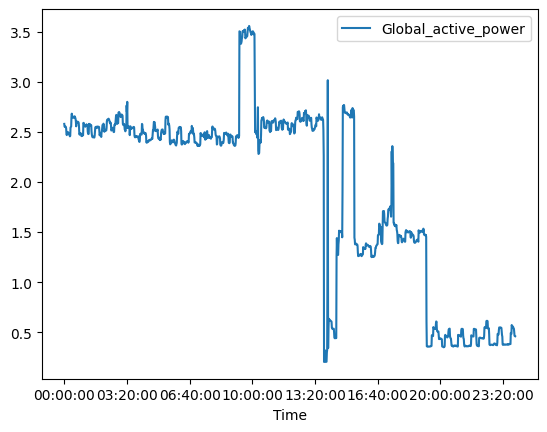

In [33]:
dia_escolhido = '2007-01-01'
df_dia_escolhido = df[df['Date'] == dia_escolhido]
df_dia_escolhido.plot(x='Time', y='Global_active_power', kind='line')

7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


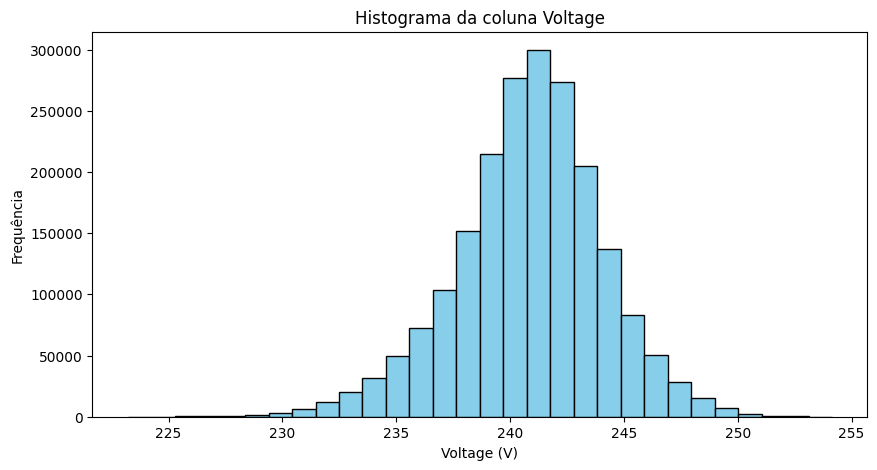

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Converte a coluna Voltage para numérico (valores inválidos viram NaN)
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Opcional: filtra só linhas válidas
df_volt = df[df['Voltage'].notna()]

# Cria o histograma
plt.figure(figsize=(10,5))
plt.hist(df_volt['Voltage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da coluna Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.show()

O histograma da variável Voltage, indica que a maioria dos valores de voltagem se concentra em torno de uma média, com a frequência diminuindo gradualmente à medida que os valores se afastam dessa média em ambas as direções. A distribuição parece ser simétrica, com picos e vales distribuídos de forma relativamente uniforme em torno do valor central.

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [37]:
df['Month_Year'] = df['Date'].dt.to_period('M')
consumo_medio_por_mes = df.groupby('Month_Year')['Global_active_power'].mean()
print("Consumo médio de Global_active_power por mês:")
print(consumo_medio_por_mes)

Consumo médio de Global_active_power por mês:
Month_Year
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
201

9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [38]:
dia_maior_consumo = df.loc[df['Global_active_power'].idxmax(), 'Date']
print(f'O dia com maior consumo de energia ativa global é {dia_maior_consumo}.')

O dia com maior consumo de energia ativa global é 2009-02-22 00:00:00.


10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [41]:
# Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.
consumo_medio_por_dia = df.groupby('Day_of_Week')['Global_active_power'].mean()
print("Consumo médio de Global_active_power por dia da semana:")
print(consumo_medio_por_dia)

Consumo médio de Global_active_power por dia da semana:
Day_of_Week
Friday       1.043394
Monday       0.999546
Saturday     1.248335
Sunday       1.220188
Thursday     0.981809
Tuesday      1.069796
Wednesday    1.082588
Name: Global_active_power, dtype: float64


11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [50]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

correlacoes = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
print("Correlações entre as variáveis:")
print(correlacoes)

Correlações entre as variáveis:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.

In [53]:
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['Total_Sub_metering'].head()

,Total_Sub_metering
0,18.0
1,17.0
2,19.0
3,18.0
4,18.0


13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.

In [54]:
media_global_active_power = df['Global_active_power'].mean()
df_acima_media = df[df['Total_Sub_metering'] > media_global_active_power]
df_acima_media

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,Month_Year,Day_Type,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,2006-12,Weekend,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,2006-12,Weekend,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,2006-12,Weekend,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,2006-12,Weekend,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,2006-12,Weekend,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075217,2010-11-26,20:21:00,1.086,0.140,240.59,4.6,0.0,2.0,0.0,Friday,2010-11,Weekday,2.0
2075222,2010-11-26,20:26:00,1.074,0.134,239.71,4.6,0.0,2.0,0.0,Friday,2010-11,Weekday,2.0
2075227,2010-11-26,20:31:00,0.982,0.000,239.33,4.2,0.0,2.0,0.0,Friday,2010-11,Weekday,2.0
2075234,2010-11-26,20:38:00,0.976,0.096,236.97,4.0,0.0,2.0,0.0,Friday,2010-11,Weekday,2.0


14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

<Axes: xlabel='Date'>

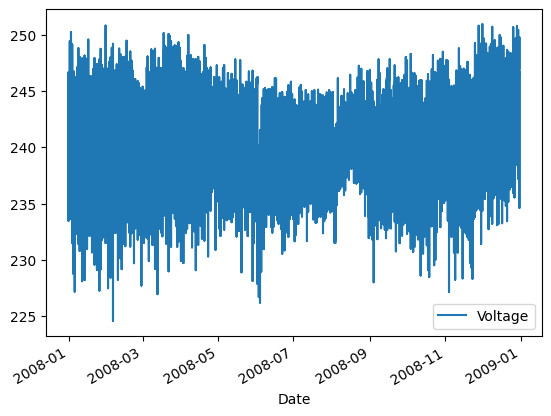

In [55]:
df_2008 = df[df['Date'].dt.year == 2008]
df_2008.plot(x='Date', y='Voltage', kind='line')

15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [56]:
consumo_por_mes = df.groupby(df['Date'].dt.month)['Global_active_power'].mean()
print("Consumo médio de Global_active_power por mês:")
print(consumo_por_mes)

Consumo médio de Global_active_power por mês:
Date
1     1.462226
2     1.300431
3     1.231343
4     1.047146
5     1.029571
6     0.909148
7     0.700359
8     0.572812
9     0.975653
10    1.137141
11    1.291532
12    1.489729
Name: Global_active_power, dtype: float64
